In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('raw_dataset.csv', index_col=1)
data.drop(columns=data.columns[0], inplace=True)
data['Direction'] = (data['SPYt'].shift(-1) > 0).astype(int)
data.tail(10)

,Close,Volume,SPYt,SPYt1,SPYt2,SPYt3,RDP5,RDP10,RDP15,RDP20,...,IXIC,AAPL,MSFT,XOM,GE,JNJ,WFC,AMZN,JPM,Direction
Date,,,,,,,,,,,,,,,,,,,,,
2013-05-16,165.339996,109913600.0,-0.004695,0.005386,0.010334,0.000795,1.510309,3.499215,4.302291,7.266120,...,3465.239990,15.520714,34.080002,90.699997,111.520020,75.744995,39.259998,13.2060,50.970001,1
2013-05-17,166.940002,129801000.0,0.009677,-0.004695,0.005386,0.010334,2.160210,3.451700,5.497976,7.370727,...,3472.009949,15.473571,34.114999,91.760002,112.430580,75.744995,39.880001,13.4950,52.299999,0
2013-05-20,166.929993,85071200.0,-0.000060,0.009677,-0.004695,0.005386,2.072887,3.183332,4.789698,6.889924,...,3472.009949,15.818929,34.114999,92.519997,112.957748,75.744995,40.200001,13.3815,52.290001,1
2013-05-21,167.169998,95804200.0,0.001438,-0.000060,0.009677,-0.004695,1.174122,2.810573,4.690635,5.951324,...,3472.009949,15.702143,34.114999,92.800003,113.389069,75.744995,40.680000,13.4430,53.020000,0
2013-05-22,165.929993,244031800.0,-0.007418,0.001438,-0.000060,0.009677,-0.114377,1.585647,4.833203,5.098801,...,3463.300049,15.762500,34.114999,92.190002,114.347557,75.744995,40.099998,13.1480,53.630001,0
2013-05-23,165.449997,211064400.0,-0.002893,-0.007418,0.001438,-0.000060,0.066530,1.577844,3.568073,4.371683,...,3459.419922,15.790714,34.114999,91.790001,113.389069,75.744995,40.009998,13.0900,53.349998,0
2013-05-24,165.309998,151573900.0,-0.000846,-0.002893,-0.007418,0.001438,-0.976402,1.162716,2.441595,4.467892,...,3459.139893,15.898214,34.114999,91.529999,112.766052,75.744995,40.240002,13.0870,53.660000,1
2013-05-28,166.300003,143679800.0,0.005989,-0.000846,-0.002893,-0.007418,-0.377398,1.687667,2.793920,4.394225,...,3472.009949,15.765714,34.114999,92.379997,113.101524,75.744995,40.520000,13.3645,54.599998,0
2013-05-29,165.220001,160363400.0,-0.006494,0.005989,-0.000846,-0.002893,-1.166475,-0.006049,1.611313,3.469444,...,3467.520020,15.891071,34.114999,92.080002,113.293221,75.744995,40.750000,13.2765,54.669998,1


# PCA

In [13]:
data = data.drop(columns=['Close', 'Date', 'Direction'], errors='ignore')

Cumulative explained variance:
[0.39717022 0.63535209 0.71177912 0.76535932 0.80533119 0.83558891
 0.85450521 0.87239122 0.88998037 0.90634146 0.92157078 0.93566369
 0.94638504 0.95622511 0.96416842 0.96923108 0.97397542 0.97792427
 0.98115291 0.98387482 0.98650117 0.98900652 0.9913125  0.99276124
 0.99394207 0.9950423  0.99607824 0.99700952 0.99760001 0.99808062
 0.99845026 0.99877681 0.99907225 0.999284   0.99947103 0.99959121
 0.99968356 0.99975984 0.99982009 0.99986891 0.99990706 0.99994245
 0.99996034 0.99997424 0.99998647 0.9999944  0.99999798 0.9999991
 0.99999994 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


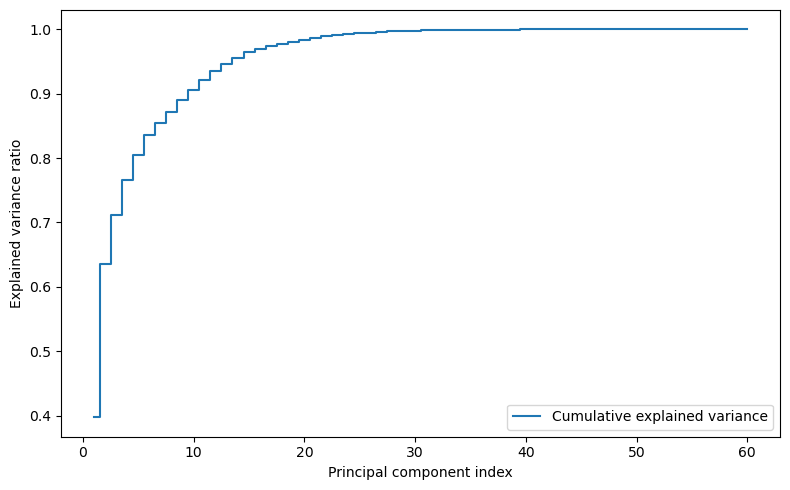

In [14]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Initialize PCA
pca = PCA()

# Fit PCA on the standardized data
pca.fit(scaled_data)

# Percentage of variance explained by each of the selected components
explained_variance = pca.explained_variance_ratio_


# Cumulative explained variance (helpful to see total variance explained up to each component)
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:")
print(cumulative_variance)

# Plotting the explained variances
plt.figure(figsize=(8, 5))
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
# Get loadings
loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=data.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
loadings_df.head()

,Volume,SPYt,SPYt1,SPYt2,SPYt3,RDP5,RDP10,RDP15,RDP20,EMA10,...,DJI,IXIC,AAPL,MSFT,XOM,GE,JNJ,WFC,AMZN,JPM
PC1,-0.084880,-0.002858,-0.002703,-0.003162,-0.002929,-0.005752,-0.010297,-0.010555,-0.010065,0.085343,...,0.045473,-0.016433,-0.115288,0.043971,-0.023338,0.183634,0.011499,0.108382,-0.131119,0.083844
PC2,0.029036,0.005044,0.004746,0.004888,0.005064,0.011700,0.015843,0.021307,0.025005,0.230384,...,0.245794,0.253013,0.203691,0.159115,0.219451,-0.006447,0.211422,0.161505,0.190373,0.153832
PC3,0.350562,-0.110560,-0.104434,-0.096271,-0.099411,-0.237037,-0.269154,-0.282713,-0.284247,-0.032233,...,-0.050008,-0.090329,-0.033763,-0.089268,0.177975,-0.051361,0.033807,-0.119298,-0.063222,-0.075617
PC4,0.059673,0.152258,0.141840,0.134827,0.140655,0.325496,0.338236,0.330203,0.296447,-0.033335,...,0.002375,-0.034747,-0.078247,0.036560,0.130619,-0.022257,-0.006480,-0.015636,-0.067215,0.158112
PC5,0.074244,0.062154,0.059369,0.059932,0.066994,0.133357,0.135812,0.116542,0.091141,-0.114082,...,-0.114557,-0.080091,0.058905,-0.262410,0.072975,-0.110893,0.040085,-0.083538,-0.003244,-0.253225



Features contributing most to PC1:
CTB1Y    0.202085
CTB6M    0.201912
T6       0.201912
CTB3M    0.201261
T3       0.201261
Name: PC1, dtype: float64


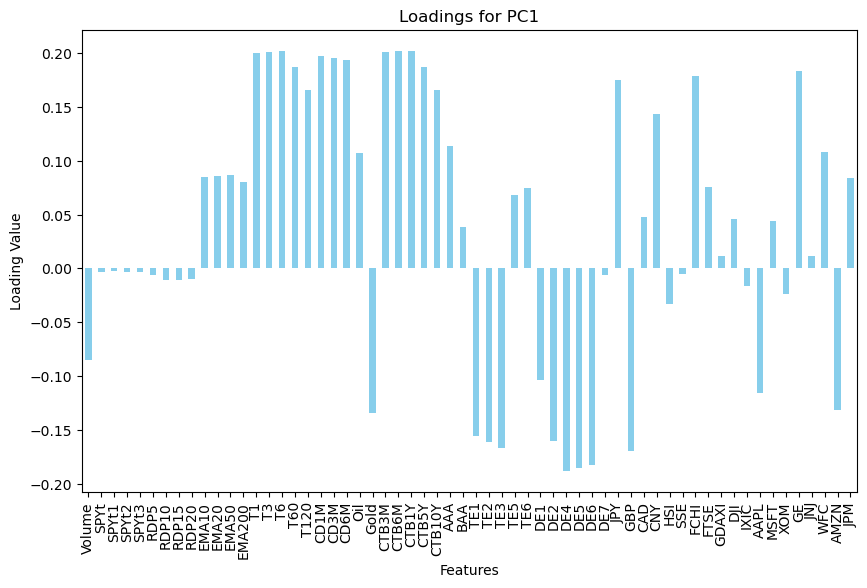

In [16]:
# Features contribute most to the first principal component
pc1_loadings = loadings_df.loc['PC1'].abs().sort_values(ascending=False)
print("\nFeatures contributing most to PC1:")
print(pc1_loadings[:5])

# Loadings for the first principal components
plt.figure(figsize=(10, 6))
loadings_df.loc['PC1'].plot(kind='bar', color='skyblue')
plt.title('Loadings for PC1')
plt.ylabel('Loading Value')
plt.xlabel('Features')
plt.show()

# KPCA

In [4]:
from sklearn.decomposition import KernelPCA

# Initialize KernelPCA with the specified parameters
kpca = KernelPCA(kernel='poly', degree=2, alpha=1, coef0=1, n_components=30)

kpca.fit(scaled_data)
# Transform the data
transformed_data = kpca.fit_transform(scaled_data)

print(transformed_data)

[[-4.17015018e-01  1.11177983e+00 -3.93233499e-01 ...  3.64988308e-02
   6.01582978e-03 -8.39514763e-03]
 [-4.36787655e-01  1.09270074e+00 -3.81625920e-01 ...  3.43915323e-02
   1.50202639e-02 -1.02366219e-02]
 [-4.36470381e-01  1.07661357e+00 -3.92843294e-01 ...  1.44489107e-02
   3.07429174e-02 -6.56935771e-03]
 ...
 [-7.68599779e-01 -1.81480810e+00 -1.55078936e-01 ...  1.92664055e-01
  -3.77110024e-02  9.17742615e-04]
 [-7.62029700e-01 -1.77124876e+00 -1.42081208e-01 ...  1.41156143e-01
   7.89572029e-02 -8.52581525e-03]
 [-7.71664294e-01 -1.81642975e+00 -1.56727664e-01 ...  1.03810904e-01
  -1.50610723e-01 -1.66758086e-02]]


# Applying the ANN on the reduced datasets

### First, get the datasets

In [5]:
# First we need to get the reduced datesets for each method :

direction = data['Direction']
data_ = data.drop(columns=['Close', 'Direction'], errors='ignore')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_)

n_pc = [1, 3, 6, 10, 15, 22, 26, 31, 34, 37, 40, 60]    # number of principal components for the transformed datasets

datasets_pca = []
for n in n_pc:
    pca = PCA(n_components=n)
    pca.fit(scaled_data)
    transformed_data = pca.transform(scaled_data)
    datasets_pca.append(transformed_data)


datasets_kpca = []
for n in n_pc:
    kpca = KernelPCA(kernel='poly', degree=2, alpha=1, coef0=1, n_components=n)
    kpca.fit(scaled_data)
    transformed_data = kpca.fit_transform(scaled_data)
    datasets_kpca.append(transformed_data)

### Creation of the ANN

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np


results_pca = []
predictions_pca = []

for i in range(len(datasets_pca)):

    print('Number of principal components :', n_pc[i])
    
    X = datasets_pca[i]
    y = direction

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)  
    # In the end we get 377 values for testing which is what the paper used too

    # Define the neural network architecture
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  
        tf.keras.layers.Dense(10, activation='tanh'),
        tf.keras.layers.Dense(2, activation='softmax')      # Two output neurons with softmax activation
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01),  # The paper doesn't specify the learning rate
                loss='mean_squared_error',  
                metrics=['accuracy'])

    # Train the model with a validation set
    history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test,y_test)

    results_pca.append([loss, accuracy])
    predictions_pca.append(model.predict(X_test))


Number of principal components : 1
12/12 [==============================] - 0s 405us/step
Number of principal components : 3
12/12 [==============================] - 0s 341us/step
Number of principal components : 6
12/12 [==============================] - 0s 366us/step
Number of principal components : 10
12/12 [==============================] - 0s 374us/step
Number of principal components : 15
12/12 [==============================] - 0s 899us/step
Number of principal components : 22
12/12 [==============================] - 0s 355us/step
Number of principal components : 26
12/12 [==============================] - 0s 351us/step
Number of principal components : 31
12/12 [==============================] - 0s 409us/step
Number of principal components : 34
12/12 [==============================] - 0s 434us/step
Number of principal components : 37
12/12 [==============================] - 0s 354us/step
Number of principal components : 40
12/12 [==============================] - 0s 363us/step
Nu

In [ ]:
results_kpca = []
predictions_kpca = []
for i in range(len(datasets_kpca)):

    print('Number of principal components :', n_pc[i])

    X = datasets_kpca[i]
    y = direction

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)  
    

    # Define the neural network architecture
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  
        tf.keras.layers.Dense(10, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01),  # The paper doesn't specify the learning rate
                loss='mean_squared_error',  
                metrics=['accuracy'])

    # Train the model with a validation set
    history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test,y_test)

    results_kpca.append([loss, accuracy])
    predictions_kpca.append(model.predict(X_test))


Number of principal components : 1
12/12 [==============================] - 0s 334us/step
Number of principal components : 3
12/12 [==============================] - 0s 335us/step
Number of principal components : 6
12/12 [==============================] - 0s 326us/step
Number of principal components : 10
12/12 [==============================] - 0s 334us/step
Number of principal components : 15
12/12 [==============================] - 0s 331us/step
Number of principal components : 22
12/12 [==============================] - 0s 347us/step
Number of principal components : 26
12/12 [==============================] - 0s 335us/step
Number of principal components : 31
12/12 [==============================] - 0s 350us/step
Number of principal components : 34
12/12 [==============================] - 0s 361us/step
Number of principal components : 37
12/12 [==============================] - 0s 389us/step
Number of principal components : 40
12/12 [==============================] - 0s 349us/step
Nu

In [ ]:
# For the predictions : if the prediction for UP is > 0.5 then = 1, otherwise = 0
preds_pca = []
for i in range(len(predictions_pca[0])):
    if predictions_pca[0][i][0] > 0.5:
       preds_pca.append(1)
    else:
        preds_pca.append(0)

preds_kpca = []
for i in range(len(predictions_kpca[0])):
    if predictions_kpca[0][i][0] > 0.5:
       preds_kpca.append(1)
    else:
        preds_kpca.append(0)

df_preds_pca = pd.DataFrame(preds_pca)
df_preds_pca.to_csv('predictions_pca.csv', index=False)

df_preds_kpca = pd.DataFrame(preds_kpca)
df_preds_kpca.to_csv('predictions_kpca.csv', index=False)